In [2]:
import pandas as pd
import pycaret

In [82]:
df = pd.read_csv('../data/since-2020.csv')
df = df.drop('Date', axis=1)
df = df.drop('Time', axis=1)
df = df.drop('Triage hallway pts TBS', axis=1)

In [83]:
df.columns

Index(['Stretcher Pts hrly', 'Stretcher Pts cum', 'Ambulatory Pts hrly',
       'Ambulatory Pts cum', 'Total Inflow hrly', 'Total Inflow cum',
       'Ambulances hrly', 'Ambulances cum', 'FLS hrly', 'Adm. requests cum',
       'Admissions cum', 'Pts.waiting for admission CUM',
       'Total Stretcher pts', 'Triage hallway pts', 'Re-Oriented Nurse cum',
       'Re-Oriented MD QTrack D/C', 'Re-Oriented MD QTrack NotD/C',
       'Resus Pts', 'Totalpts in PODs except Psych', 'Green Pts',
       'Green Pts TBS', 'Yellow PTS', 'Yellow Pts TBS',
       'Orancge Pts except psych', 'Orange Pts TBS',
       'Consults > 2h in PODS except IM', 'Consult for IM >4h in PODS',
       'Plain films reqs > 2 h in PODs', 'CTs reqs > 2 h in PODs',
       'Post POD (Family room)', 'Stretcher Pts in Vertical',
       'Stretcher Pts TBS in Vertical', 'Stretcher Pts in Vertical on Lazyboy',
       'Vertical Pts Waiting for Results', 'Ambulatory Pts in Vertical',
       'Ambulatory Pts TBS in Vertical', 'QTrack

In [84]:
for column in df.columns:
    if column == 'Triage hallway pts':
        continue
    if column == 'ds':
        continue
    for lag in [1,2,3,4]:
        df[column+'_lag_'+str(lag)] = df[column].shift(-lag)
df = df.dropna()
df.ds = pd.to_datetime(df.ds)
df = df.sort_values(by='ds', ascending=True)
df.head(10)

,Stretcher Pts hrly,Stretcher Pts cum,Ambulatory Pts hrly,Ambulatory Pts cum,Total Inflow hrly,Total Inflow cum,Ambulances hrly,Ambulances cum,FLS hrly,Adm. requests cum,...,Psych pts waiting for admission_lag_3,Psych pts waiting for admission_lag_4,Total Pod TBS_lag_1,Total Pod TBS_lag_2,Total Pod TBS_lag_3,Total Pod TBS_lag_4,Total Vertical TBS_lag_1,Total Vertical TBS_lag_2,Total Vertical TBS_lag_3,Total Vertical TBS_lag_4
4307,3,126,7,165,10,291,3,47,0,37,...,0.0,0.0,9.0,8.0,12.0,10.0,6.0,4.0,9.0,18.0
4306,2,128,4,169,6,297,3,50,0,38,...,0.0,0.0,10.0,9.0,8.0,12.0,11.0,6.0,4.0,9.0
4305,3,3,2,2,5,5,2,2,0,1,...,0.0,0.0,8.0,10.0,9.0,8.0,12.0,11.0,6.0,4.0
4304,2,5,0,2,2,7,1,3,0,3,...,0.0,0.0,6.0,8.0,10.0,9.0,11.0,12.0,11.0,6.0
4303,3,8,1,3,4,11,1,4,0,4,...,0.0,0.0,4.0,6.0,8.0,10.0,7.0,11.0,12.0,11.0
4302,2,10,1,4,3,14,2,6,0,5,...,0.0,0.0,0.0,4.0,6.0,8.0,12.0,7.0,11.0,12.0
4301,1,11,2,6,3,17,0,6,0,6,...,0.0,0.0,2.0,0.0,4.0,6.0,9.0,12.0,7.0,11.0
4300,2,13,1,7,3,20,1,7,0,8,...,0.0,0.0,2.0,2.0,0.0,4.0,8.0,9.0,12.0,7.0
4299,7,20,2,9,9,29,1,8,0,8,...,0.0,0.0,1.0,2.0,2.0,0.0,7.0,8.0,9.0,12.0
4298,1,21,3,12,4,33,0,8,0,13,...,0.0,0.0,3.0,1.0,2.0,2.0,11.0,7.0,8.0,9.0


In [86]:
df.head(20)[['ds', 'Total Pod TBS', 'Total Pod TBS_lag_1','Total Pod TBS_lag_2','Total Pod TBS_lag_3','Total Pod TBS_lag_4']]

,ds,Total Pod TBS,Total Pod TBS_lag_1,Total Pod TBS_lag_2,Total Pod TBS_lag_3,Total Pod TBS_lag_4
4307,2021-07-26 23:00:00,10,9.0,8.0,12.0,10.0
4306,2021-07-27 00:00:00,8,10.0,9.0,8.0,12.0
4305,2021-07-27 01:00:00,6,8.0,10.0,9.0,8.0
4304,2021-07-27 02:00:00,4,6.0,8.0,10.0,9.0
4303,2021-07-27 03:00:00,0,4.0,6.0,8.0,10.0
4302,2021-07-27 04:00:00,2,0.0,4.0,6.0,8.0
4301,2021-07-27 05:00:00,2,2.0,0.0,4.0,6.0
4300,2021-07-27 06:00:00,1,2.0,2.0,0.0,4.0
4299,2021-07-27 07:00:00,3,1.0,2.0,2.0,0.0
4298,2021-07-27 08:00:00,4,3.0,1.0,2.0,2.0


In [87]:
df['Triage hallway pts'] = df['Triage hallway pts'].shift(4)

In [88]:
df = df.dropna()

In [89]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3874, 227)
Unseen Data For Predictions: (430, 227)


In [92]:
df.columns.tolist()

['Stretcher Pts hrly',
 'Stretcher Pts cum',
 'Ambulatory Pts hrly',
 'Ambulatory Pts cum',
 'Total Inflow hrly',
 'Total Inflow cum',
 'Ambulances hrly',
 'Ambulances cum',
 'FLS hrly',
 'Adm. requests cum',
 'Admissions cum',
 'Pts.waiting for admission CUM',
 'Total Stretcher pts',
 'Triage hallway pts',
 'Re-Oriented Nurse cum',
 'Re-Oriented MD QTrack D/C',
 'Re-Oriented MD QTrack NotD/C',
 'Resus Pts',
 'Totalpts in PODs except Psych',
 'Green Pts',
 'Green Pts TBS',
 'Yellow PTS',
 'Yellow Pts TBS',
 'Orancge Pts except psych',
 'Orange Pts TBS',
 'Consults > 2h in PODS except IM',
 'Consult for IM >4h in PODS',
 'Plain films reqs > 2 h in PODs',
 'CTs reqs > 2 h in PODs',
 'Post POD (Family room)',
 'Stretcher Pts in Vertical',
 'Stretcher Pts TBS in Vertical',
 'Stretcher Pts in Vertical on Lazyboy',
 'Vertical Pts Waiting for Results',
 'Ambulatory Pts in Vertical',
 'Ambulatory Pts TBS in Vertical',
 'QTrack Patients TBS',
 'GARAGE patient TBS',
 'Consults > 2h in Vertical E

In [95]:
numeric_columns = df.columns.tolist()
# numeric_columns.remove('Date')
# numeric_columns.remove('Time')
numeric_columns.remove('ds')
numeric_columns.remove('Triage hallway pts')
numeric_columns

['Stretcher Pts hrly',
 'Stretcher Pts cum',
 'Ambulatory Pts hrly',
 'Ambulatory Pts cum',
 'Total Inflow hrly',
 'Total Inflow cum',
 'Ambulances hrly',
 'Ambulances cum',
 'FLS hrly',
 'Adm. requests cum',
 'Admissions cum',
 'Pts.waiting for admission CUM',
 'Total Stretcher pts',
 'Re-Oriented Nurse cum',
 'Re-Oriented MD QTrack D/C',
 'Re-Oriented MD QTrack NotD/C',
 'Resus Pts',
 'Totalpts in PODs except Psych',
 'Green Pts',
 'Green Pts TBS',
 'Yellow PTS',
 'Yellow Pts TBS',
 'Orancge Pts except psych',
 'Orange Pts TBS',
 'Consults > 2h in PODS except IM',
 'Consult for IM >4h in PODS',
 'Plain films reqs > 2 h in PODs',
 'CTs reqs > 2 h in PODs',
 'Post POD (Family room)',
 'Stretcher Pts in Vertical',
 'Stretcher Pts TBS in Vertical',
 'Stretcher Pts in Vertical on Lazyboy',
 'Vertical Pts Waiting for Results',
 'Ambulatory Pts in Vertical',
 'Ambulatory Pts TBS in Vertical',
 'QTrack Patients TBS',
 'GARAGE patient TBS',
 'Consults > 2h in Vertical Except IM',
 'Consult fo

In [96]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Triage hallway pts', numeric_features=numeric_columns, session_id=123)

,Description,Value
0,session_id,123
1,Target,Triage hallway pts
2,Original Data,"(3874, 227)"
3,Missing Values,False
4,Numeric Features,225
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2711, 265)"


In [97]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0001,0.0000,0.0002,1.0000,0.0002,0.0001,0.0310
ridge,Ridge Regression,0.0021,0.0000,0.0032,1.0000,0.0020,0.0017,0.0290
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1500
br,Bayesian Ridge,0.0051,0.0001,0.0074,1.0000,0.0064,0.0033,0.0520
lightgbm,Light Gradient Boosting Machine,0.5353,1.0869,1.0412,0.6328,0.3783,0.5606,0.2070
et,Extra Trees Regressor,0.5646,1.1991,1.0916,0.6036,0.3912,0.5301,1.0860
rf,Random Forest Regressor,0.5720,1.2586,1.1186,0.5844,0.3999,0.5403,2.0490
gbr,Gradient Boosting Regressor,0.5776,1.2620,1.1199,0.5796,0.3959,0.5605,0.5250
huber,Huber Regressor,0.7222,1.3301,1.1473,0.5632,0.4547,0.4974,0.3190
knn,K Neighbors Regressor,0.6180,1.6551,1.2787,0.4618,0.4365,0.6264,0.0370


In [31]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [76]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5661,1.0449,1.0222,0.6174,0.3874,0.6045
1,0.5550,1.1369,1.0662,0.6637,0.3876,0.5773
2,0.4867,0.8870,0.9418,0.7204,0.3400,0.5391
3,0.6430,1.7339,1.3168,0.6693,0.3830,0.5474
4,0.5465,1.0081,1.0041,0.7071,0.3517,0.5836
5,0.5296,0.9272,0.9629,0.5992,0.3968,0.5484
6,0.5054,0.7694,0.8771,0.7149,0.3650,0.5233
7,0.5412,1.0352,1.0175,0.6942,0.3747,0.5155
8,0.5099,0.8072,0.8984,0.6633,0.3743,0.5695
9,0.5918,1.5396,1.2408,0.6764,0.3487,0.6394


In [77]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5751,1.0388,1.0192,0.6197,0.3999,0.5987
1,0.5538,1.1522,1.0734,0.6592,0.3946,0.5632
2,0.5279,1.0014,1.0007,0.6844,0.3580,0.5352
3,0.6455,1.6615,1.2890,0.6831,0.3853,0.5395
4,0.5529,1.0524,1.0259,0.6942,0.3642,0.5382
5,0.5374,0.9536,0.9765,0.5878,0.3983,0.5507
6,0.4852,0.6954,0.8339,0.7423,0.3552,0.4813
7,0.5316,0.9765,0.9882,0.7116,0.3714,0.4966
8,0.5106,0.8538,0.9240,0.6439,0.3786,0.5656
9,0.5766,1.3952,1.1812,0.7068,0.3407,0.6100


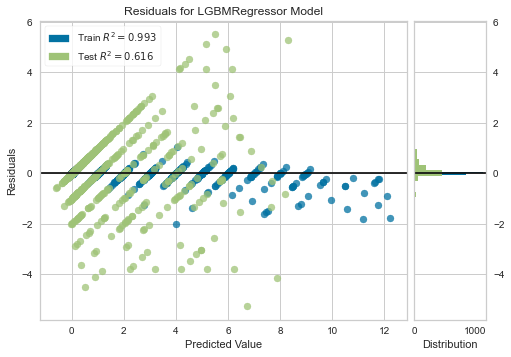

In [78]:
plot_model(tuned_lightgbm)


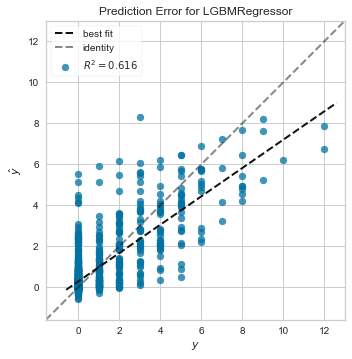

In [79]:
plot_model(tuned_lightgbm, plot = 'error')

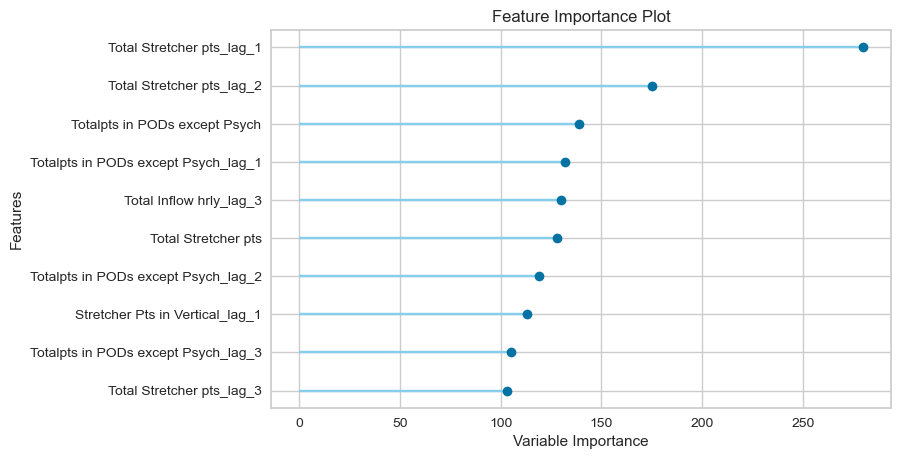

In [80]:
plot_model(tuned_lightgbm, plot='feature')
